In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dfc = df.copy()

In [5]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
print("Missing values:", df.isnull().sum().sum())

# 1 = Left the company, 0 = Stayed
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime_Numeric'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Data loaded and cleaned. Ready for Category 1.")

Missing values: 0
Data loaded and cleaned. Ready for Category 1.


# Category 1: The "Burnout" Factors (Work Conditions)

### The Overtime trap

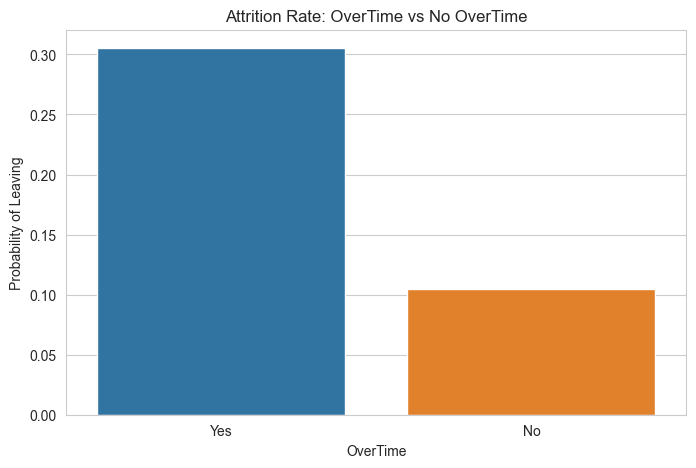

Business Insight: Employees working overtime have a 30.5% attrition rate, compared to 10.4% for those who don't.
Recommendation: Investigate workload distribution to prevent burnout.


In [32]:
# Set plot style
sns.set_style("whitegrid")

# 1. Calculate Attrition Rate by OverTime
overtime_attrition = df.groupby('OverTime')['Attrition_Numeric'].mean().reset_index()

# 2. Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='OverTime', y='Attrition_Numeric', data=df, hue='OverTime', errorbar= None)
plt.title('Attrition Rate: OverTime vs No OverTime')
plt.ylabel('Probability of Leaving')
plt.show()

# 3. Business Insight Logic
rate_yes = df[df['OverTime'] == 'Yes']['Attrition_Numeric'].mean()
rate_no = df[df['OverTime'] == 'No']['Attrition_Numeric'].mean()

print(f"Business Insight: Employees working overtime have a {rate_yes:.1%} attrition rate, "
      f"compared to {rate_no:.1%} for those who don't.")
print("Recommendation: Investigate workload distribution to prevent burnout.")

### The Commuter Stress Test

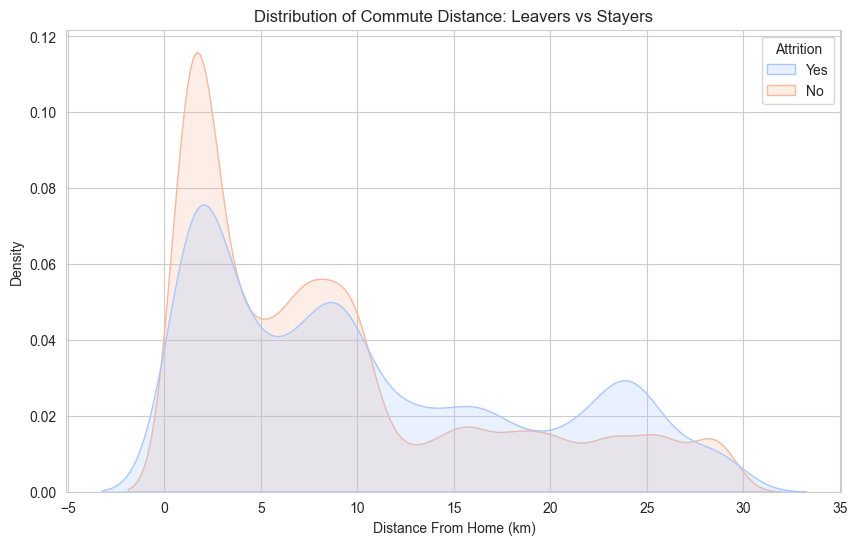

Business Insight: Employees who leave, commute an average of 10.6 km, while those who stay commute 8.9 km.
Recommendation: Consider remote work options or shuttle services for employees living >15km away.


In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='DistanceFromHome', hue='Attrition', fill=True, common_norm=False, palette='coolwarm', bw_adjust=0.5)
plt.title('Distribution of Commute Distance: Leavers vs Stayers')
plt.xlabel('Distance From Home (km)')
plt.show()

avg_dist_leavers = df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()
avg_dist_stayers = df[df['Attrition'] == 'No']['DistanceFromHome'].mean()

print(f"Business Insight: Employees who leave, commute an average of {avg_dist_leavers:.1f} km, "
      f"while those who stay commute {avg_dist_stayers:.1f} km.")
print("Recommendation: Consider remote work options or shuttle services for employees living >15km away.")

### Business Travel Fatigue

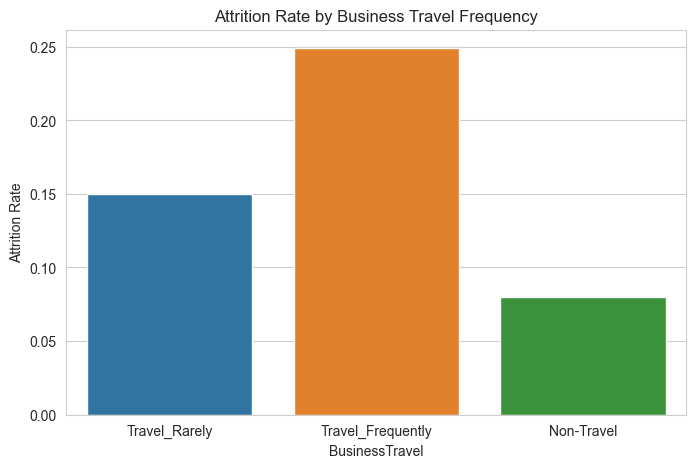

Business Insight: Frequent travelers have a 24.9% attrition rate, which is significantly higher than rare travelers (23.0%).
Recommendation: Rotate travel responsibilities to reduce fatigue.


In [40]:
plt.figure(figsize=(8, 5))

sns.barplot(x='BusinessTravel', y='Attrition_Numeric', data=df, hue='BusinessTravel', errorbar=None)
plt.title('Attrition Rate by Business Travel Frequency')
plt.ylabel('Attrition Rate')
plt.show()

travel_freq = df[df['BusinessTravel'] == 'Travel_Frequently']['Attrition_Numeric'].mean()
travel_rare = df[df['BusinessTravel'] == 'Travel_Rarely']['Attrition_Numeric'].mean() +df[df['BusinessTravel'] == 'Non-Travel']['Attrition_Numeric'].mean()


print(f"Business Insight: Frequent travelers have a {travel_freq:.1%} attrition rate, "
      f"which is significantly higher than rare travelers ({travel_rare:.1%}).")
print("Recommendation: Rotate travel responsibilities to reduce fatigue.")

In [11]:
# intersection_indices_list = list(set_A_indices.intersection(set_B_indices))
# intersection_df = df.loc[intersection_indices_list]

# attrition_rate_intersection = intersection_df['Attrition_Numeric'].mean()
# overall_attrition_rate = df['Attrition_Numeric'].mean()

# print("\n--- Business Insight ---")
# print(f"Overall Attrition Rate for the entire company: {overall_attrition_rate:.1%}")
# print(f"Attrition Rate for employees with BOTH risk factors (A ∩ B): {attrition_rate_intersection:.1%}")

# if attrition_rate_intersection > overall_attrition_rate * 1.5:
#     print("\nRecommendation: This intersection group has a dangerously high attrition rate. "
#           "The business should prioritize retention programs (e.g., remote work, travel compensation) "
#           "specifically for these dual-risk employees.")

# Category 2: Financial Incentives (Money)

### The "Flight Risk" Zone

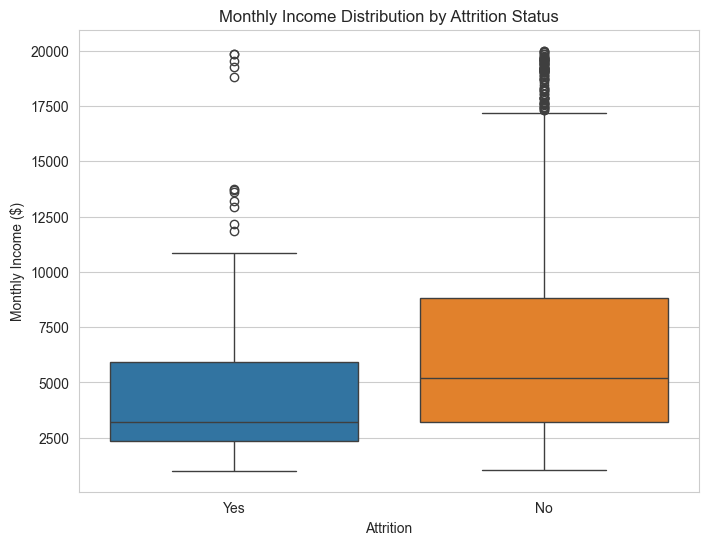


--- Business Insight ---
Median Income for Leavers: $3,202
Median Income for Stayers: $5,204
Recommendation: Review market competitiveness, especially for roles falling below the median income for stayers. Low pay is a major factor.


In [12]:
# Set the plot style
sns.set_style("whitegrid")

# 1. Plot Monthly Income distribution for Attrition groups
plt.figure(figsize=(8, 6))
# Use 'MonthlyIncome' on Y, 'Attrition' on X
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, hue='Attrition')
plt.title('Monthly Income Distribution by Attrition Status')
plt.ylabel('Monthly Income ($)')
plt.show()

# 2. Business Insight Logic
median_income_leavers = df[df['Attrition'] == 'Yes']['MonthlyIncome'].median()
median_income_stayers = df[df['Attrition'] == 'No']['MonthlyIncome'].median()

print(f"\n--- Business Insight ---")
print(f"Median Income for Leavers: ${median_income_leavers:,.0f}")
print(f"Median Income for Stayers: ${median_income_stayers:,.0f}")
print("Recommendation: Review market competitiveness, especially for roles falling below the median income for stayers. Low pay is a major factor.")

### The "Golden Handcuffs" Effect

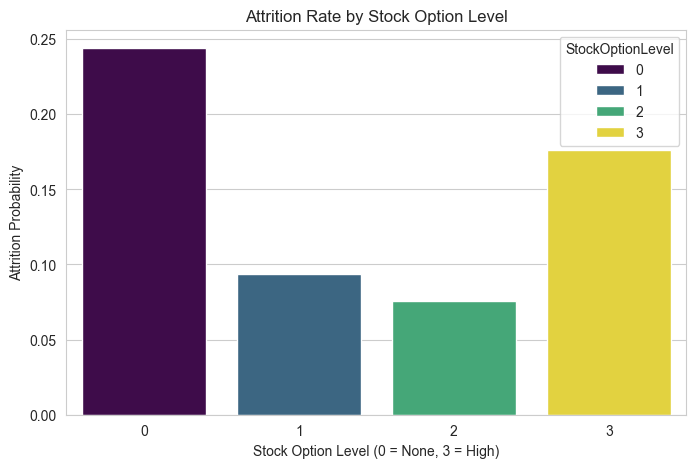

Business Insight: Employees with NO stock options have a high attrition rate of 24.4%. Simply giving Level 1 options drops this rate significantly.
Comparatively, employees with ANY stock options have an average attrition of only 9.9%.


In [26]:
# 1. Bar Plot
plt.figure(figsize=(8, 5))
# We use mean() to get the percentage of people who quit (1s) vs stayed (0s)
sns.barplot(x='StockOptionLevel', y='Attrition_Numeric', data=df, palette='viridis', hue='StockOptionLevel', errorbar=None)
plt.title('Attrition Rate by Stock Option Level')
plt.ylabel('Attrition Probability')
plt.xlabel('Stock Option Level (0 = None, 3 = High)')
plt.show()

# 2. Business Insight Logic
rate_no_stock = df[df['StockOptionLevel'] == 0]['Attrition_Numeric'].mean()
rate_with_stock = df[df['StockOptionLevel'] > 0]['Attrition_Numeric'].mean()

print(f"Business Insight: Employees with NO stock options have a high attrition rate of {rate_no_stock:.1%}. "
      f"Simply giving Level 1 options drops this rate significantly.")
print(f"Comparatively, employees with ANY stock options have an average attrition of only {rate_with_stock:.1%}.")

### Raise Effectiveness

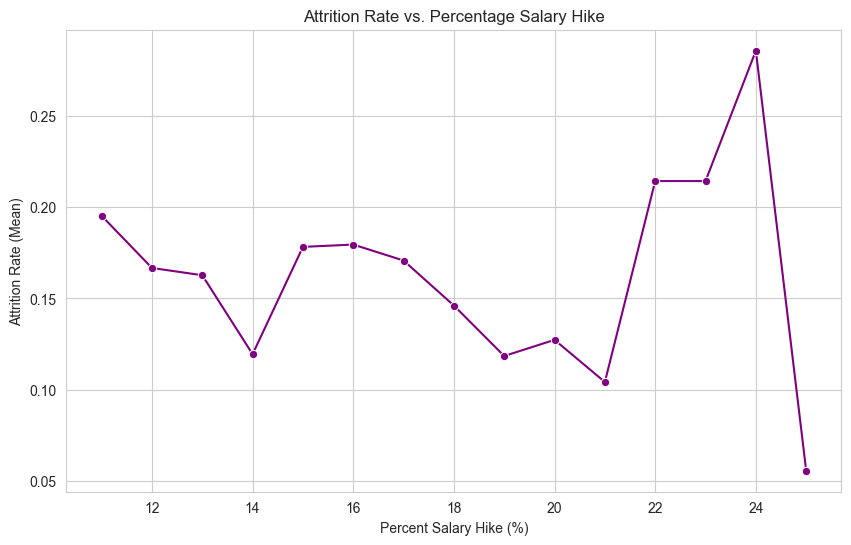


--- Business Insight ---
The minimum attrition rate (5.6%) occurs at a salary hike of 25%.
Recommendation: Ensure high-potential employees consistently receive raises in the optimal range (where the attrition line dips lowest).


In [14]:
# 1. Group the data by PercentSalaryHike and calculate mean attrition
hike_attrition = df.groupby('PercentSalaryHike')['Attrition_Numeric'].mean().reset_index()

# 2. Plot the relationship
plt.figure(figsize=(10, 6))
# Line plot is best to show the trend
sns.lineplot(x='PercentSalaryHike', y='Attrition_Numeric', data=hike_attrition, marker='o', color='purple')
plt.title('Attrition Rate vs. Percentage Salary Hike')
plt.xlabel('Percent Salary Hike (%)')
plt.ylabel('Attrition Rate (Mean)')
plt.show()

# 3. Business Insight Logic
min_hike_attrition = hike_attrition.loc[hike_attrition['Attrition_Numeric'].idxmin()]

print(f"\n--- Business Insight ---")
print(f"The minimum attrition rate ({min_hike_attrition['Attrition_Numeric']:.1%}) occurs at a salary hike of {min_hike_attrition['PercentSalaryHike']:.0f}%.")
print("Recommendation: Ensure high-potential employees consistently receive raises in the optimal range (where the attrition line dips lowest).")

# Category 3: Career Progression (Growth)

### The "Stagnation" Check

In [ ]:
# 1. Plot Distribution of Years Since Last Promotion
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='YearsSinceLastPromotion', hue='Attrition', fill=True, common_norm=False, palette='magma')
plt.title('Impact of Time Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.show()

# 2. Business Insight Logic
# Let's see the attrition rate for people waiting > 5 years
stagnant_attrition = df[df['YearsSinceLastPromotion'] > 5]['Attrition_Numeric'].mean()
recent_promotion_attrition = df[df['YearsSinceLastPromotion'] < 2]['Attrition_Numeric'].mean()

print(f"Business Insight: Employees who haven't been promoted in 5+ years have an attrition rate of {stagnant_attrition:.1%}.")
print(f"Comparatively, those promoted recently (<2 years) are at {recent_promotion_attrition:.1%}.")
print("Recommendation: Implement a 'Step-Up' program for employees stuck at the same level for 4+ years to prevent stagnation.")

### Manager Stability (The "New Boss" Effect)

In [ ]:
# 1. Calculate Attrition Rate by Years with Manager
manager_stability = df.groupby('YearsWithCurrManager')['Attrition_Numeric'].mean().reset_index()

# 2. Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=manager_stability, x='YearsWithCurrManager', y='Attrition_Numeric', marker='o', color='green')
plt.title('Attrition Rate vs. Years with Current Manager')
plt.ylabel('Attrition Rate')
plt.xlabel('Years with Current Manager')
# Add a red zone for the danger area
plt.axvspan(0, 1, color='red', alpha=0.1, label='New Manager Risk Zone')
plt.legend()
plt.show()

# 3. Business Insight Logic
risk_year_0 = df[df['YearsWithCurrManager'] == 0]['Attrition_Numeric'].mean()

print(f"Business Insight: The highest risk of attrition occurs in Year 0 (New Manager) with a rate of {risk_year_0:.1%}.")
print("Recommendation: The transition period is critical. HR needs to support teams heavily during the first 6 months of a manager change.")

### The "Entry Level" Crisis

In [ ]:
# 1. Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='JobLevel', y='Attrition_Numeric', data=df, palette='Blues_d', errorbar=None)
plt.title('Attrition Rate by Job Level')
plt.ylabel('Attrition Rate')
plt.xlabel('Job Level (1 = Entry, 5 = Executive)')
plt.show()

# 2. Business Insight Logic
level_1_rate = df[df['JobLevel'] == 1]['Attrition_Numeric'].mean()
level_5_rate = df[df['JobLevel'] == 5]['Attrition_Numeric'].mean()

print(f"Business Insight: Entry-level employees (Level 1) have a massive attrition rate of {level_1_rate:.1%}, "
      f"whereas Executives (Level 5) rarely leave ({level_5_rate:.1%}).")
print("Recommendation: Our retention strategy must be tiered. Focus on 'Career Pathing' for Level 1s, as they likely leave for better titles elsewhere.")

# Category 4: Demographics

### The "Young Talent" Exodus

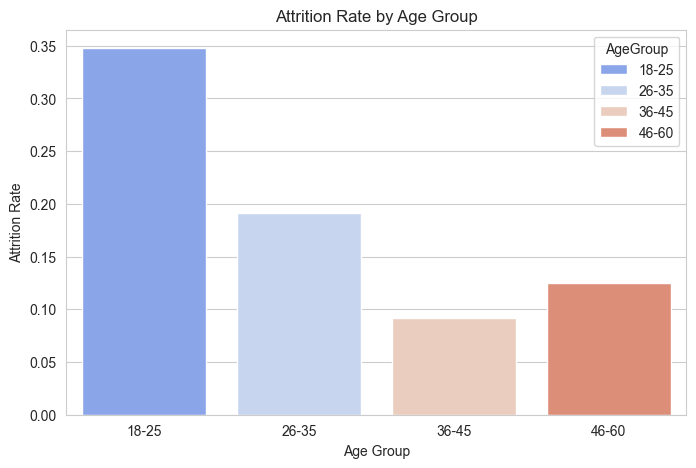

Business Insight: We are losing our 'Young Talent' (18-25) at a concerning rate of 34.8%.
In contrast, the mid-career stability group (36-45) has a much lower attrition of 9.2%.
Recommendation: Implement a 'Young Leaders' mentorship program to engage Gen Z employees early.


In [25]:
# 1. Create Age Groups (Binning)
# We cut the continuous 'Age' variable into meaningful business groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

# 2. Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Attrition_Numeric', data=df, palette='coolwarm',hue='AgeGroup', errorbar=None)
plt.title('Attrition Rate by Age Group')
plt.ylabel('Attrition Rate')
plt.xlabel('Age Group')
plt.show()

# 3. Business Insight Logic
young_rate = df[df['AgeGroup'] == '18-25']['Attrition_Numeric'].mean()
mid_rate = df[df['AgeGroup'] == '36-45']['Attrition_Numeric'].mean()

print(f"Business Insight: We are losing our 'Young Talent' (18-25) at a concerning rate of {young_rate:.1%}.")
print(f"In contrast, the mid-career stability group (36-45) has a much lower attrition of {mid_rate:.1%}.")
print("Recommendation: Implement a 'Young Leaders' mentorship program to engage Gen Z employees early.")

### Gender Balance

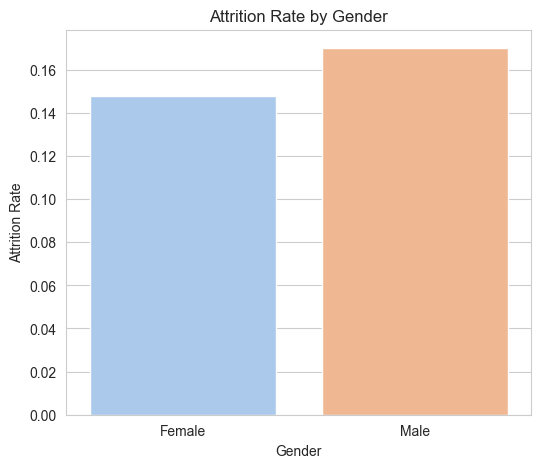

Business Insight: Male attrition (17.0%) is slightly higher/lower than Female attrition (14.8%).
Observation: If the difference is less than 2-3%, this is likely not a gender-specific cultural issue.


In [22]:
# 1. Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Gender', y='Attrition_Numeric', data=df, palette='pastel',hue = 'Gender', errorbar=None)
plt.title('Attrition Rate by Gender')
plt.ylabel('Attrition Rate')
plt.show()

# 2. Business Insight Logic
male_rate = df[df['Gender'] == 'Male']['Attrition_Numeric'].mean()
female_rate = df[df['Gender'] == 'Female']['Attrition_Numeric'].mean()

print(f"Business Insight: Male attrition ({male_rate:.1%}) is slightly higher/lower than Female attrition ({female_rate:.1%}).")
print("Observation: If the difference is less than 2-3%, this is likely not a gender-specific cultural issue.")

### The "Single & Mobile" Effect

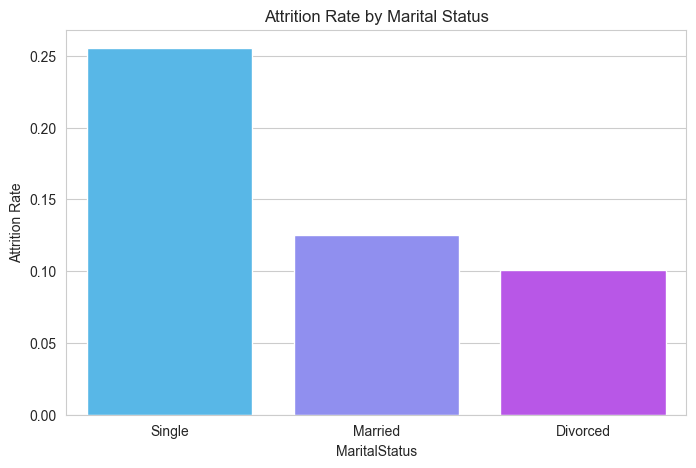

Business Insight: Single employees are the most volatile, with an attrition rate of 25.5%.
Married employees are much stickier (12.5%).
Recommendation: Single employees are 'Flight Risks' because they can relocate easily. We should offer them specific perks (like travel or social clubs) to keep them engaged.


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='MaritalStatus', y='Attrition_Numeric', data=df, palette='cool',hue='MaritalStatus', errorbar=None)
plt.title('Attrition Rate by Marital Status')
plt.ylabel('Attrition Rate')
plt.show()

single_rate = df[df['MaritalStatus'] == 'Single']['Attrition_Numeric'].mean()
married_rate = df[df['MaritalStatus'] == 'Married']['Attrition_Numeric'].mean()

print(f"Business Insight: Single employees are the most volatile, with an attrition rate of {single_rate:.1%}.")
print(f"Married employees are much stickier ({married_rate:.1%}).")
print("Recommendation: Single employees are 'Flight Risks' because they can relocate easily. We should offer them specific perks (like travel or social clubs) to keep them engaged.")